## 美国King County房价预测训练赛

https://www.kaggle.com/harlfoxem/housesalesprediction

数据主要包括2014年5月至2015年5月美国King County的房屋销售价格以及房屋的基本信息。
数据分为训练数据和测试数据，分别保存在kc_train.csv和kc_test.csv两个文件中。
其中训练数据主要包括10000条记录，14个字段，主要字段说明如下：
第一列“销售日期”：2014年5月到2015年5月房屋出售时的日期
第二列“销售价格”：房屋交易价格，单位为美元，是目标预测值
第三列“卧室数”：房屋中的卧室数目
第四列“浴室数”：房屋中的浴室数目
第五列“房屋面积”：房屋里的生活面积
第六列“停车面积”：停车坪的面积
第七列“楼层数”：房屋的楼层数
第八列“房屋评分”：King County房屋评分系统对房屋的总体评分
第九列“建筑面积”：除了地下室之外的房屋建筑面积
第十列“地下室面积”：地下室的面积
第十一列“建筑年份”：房屋建成的年份
第十二列“修复年份”：房屋上次修复的年份
第十三列"纬度"：房屋所在纬度
第十四列“经度”：房屋所在经度

In [288]:
import warnings
warnings.filterwarnings('ignore')

In [289]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from scipy import stats
%matplotlib inline



In [338]:
#读取数据
file=open(r'C:\Users\jxluo\Downloads\美国King County房价预测训练赛\kc_train.csv')
data=pd.read_csv(file, encoding='utf-8',header=None)

data.columns=['date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long']


In [291]:
data.drop('date', axis=1, inplace=True)


In [292]:
print(data.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
dtype: int64


In [293]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
price            10000 non-null int64
bedrooms         10000 non-null int64
bathrooms        10000 non-null float64
sqft_living      10000 non-null int64
sqft_lot         10000 non-null int64
floors           10000 non-null float64
grade            10000 non-null int64
sqft_above       10000 non-null int64
sqft_basement    10000 non-null int64
yr_built         10000 non-null int64
yr_renovated     10000 non-null int64
lat              10000 non-null float64
long             10000 non-null float64
dtypes: float64(4), int64(9)
memory usage: 1015.7 KB
None


In [294]:
data.head(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  grade  \
0  545000         3       2.25         1670      6240     1.0      8   
1  785000         4       2.50         3300     10514     2.0     10   
2  765000         3       3.25         3190      5283     2.0      9   
3  720000         5       2.50         2900      9525     2.0      9   
4  449500         5       2.75         2040      7488     1.0      7   

   sqft_above  sqft_basement  yr_built  yr_renovated      lat     long  
0        1240            430      1974             0  47.6413 -122.113  
1        3300              0      1984             0  47.6323 -122.036  
2        3190              0      2007             0  47.5534 -122.002  
3        2900              0      1989             0  47.5442 -122.138  
4        1200            840      1969             0  47.7289 -122.172

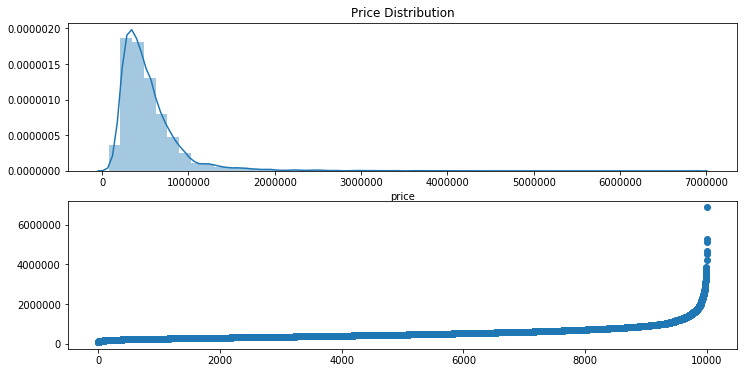

In [295]:
plt.figure(figsize=(12,6))
#绘制价格的数据分布曲线
plt.subplot(211)
plt.title('Price Distribution')
sns.distplot(data['price'])
#绘制价格曲线
plt.subplot(212)
plt.scatter(range(data.shape[0]), np.sort(data['price'].values))
plt.show()


In [296]:
#查看特征统计信息
data.describe()

price      bedrooms   bathrooms   sqft_living      sqft_lot  \
count  1.000000e+04  10000.000000  10000.0000  10000.000000  1.000000e+04   
mean   5.428749e+05      3.367600      2.1168   2082.488400  1.535273e+04   
std    3.729258e+05      0.893169      0.7741    922.878916  4.577623e+04   
min    7.500000e+04      0.000000      0.0000    390.000000  5.720000e+02   
25%    3.225000e+05      3.000000      1.7500   1430.000000  5.023250e+03   
50%    4.507000e+05      3.000000      2.2500   1910.000000  7.590000e+03   
75%    6.450000e+05      4.000000      2.5000   2550.000000  1.071700e+04   
max    6.885000e+06     10.000000      7.7500   9890.000000  1.651359e+06   

             floors         grade    sqft_above  sqft_basement      yr_built  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean       1.502850      7.664800   1791.474900     291.013500   1971.204700   
std        0.543642      1.173873    829.449437     446.641339     29.322957   
min        1.000000      3.000000    390.000000       0.000000   1900.000000   
25%        1.000000      7.000000   1190.000000       0.000000   1951.750000   
50%        1.500000      7.000000   1560.000000       0.000000   1975.000000   
75%        2.000000      8.000000   2211.500000     560.000000   1997.000000   
max        3.500000     13.000000   8860.000000    4820.000000   2015.000000   

       yr_renovated           lat          long  
count  10000.000000  10000.000000  10000.000000  
mean      85.209700     47.560629   -122.215845  
std      403.491421      0.138570      0.139739  
min        0.000000     47.159300   -122.519000  
25%        0.000000     47.471375   -122.329000  
50%        0.000000     47.572200   -122.234000  
75%        0.000000     47.678400   -122.127000  
max     2015.000000     47.777600   -121.315000

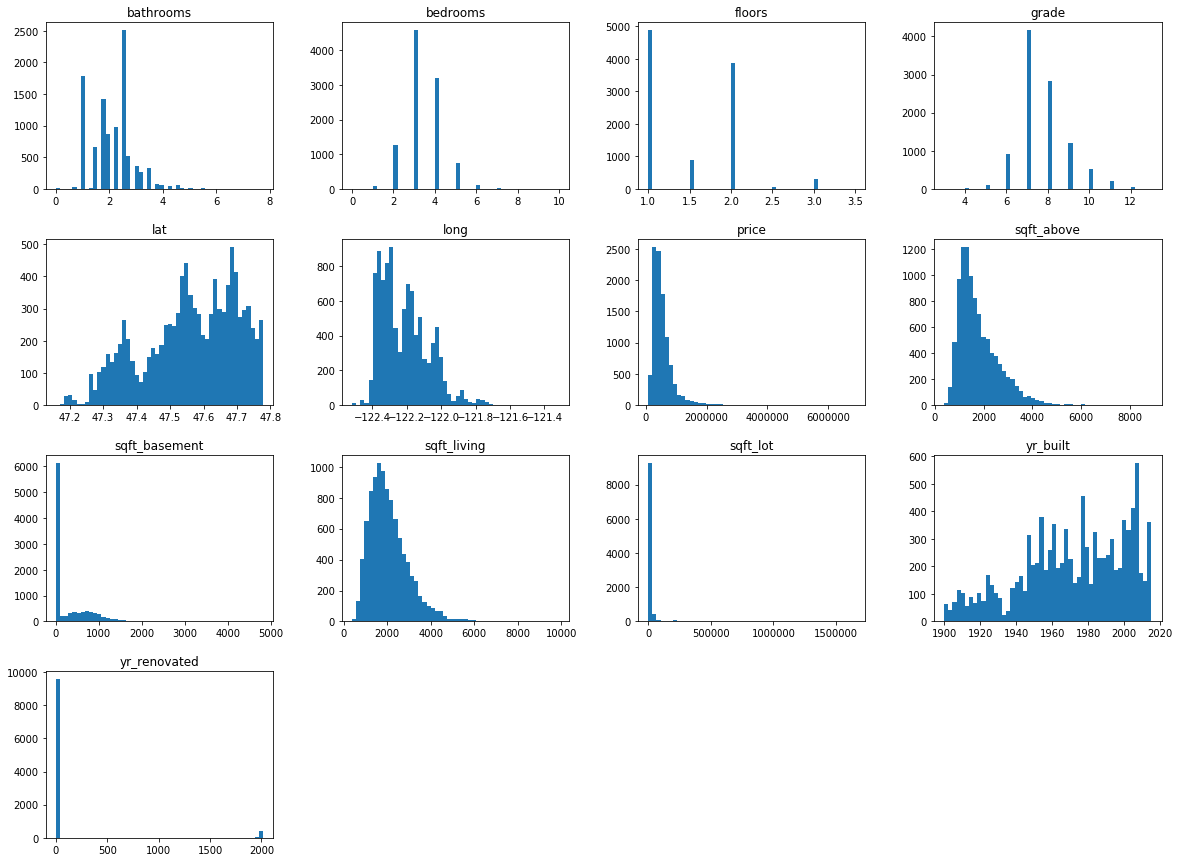

In [297]:
#绘制各个特征的分布柱状图
data.hist(figsize=(20,15), bins=50, grid=False)
plt.show()

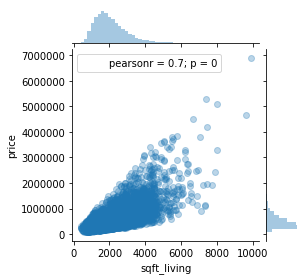

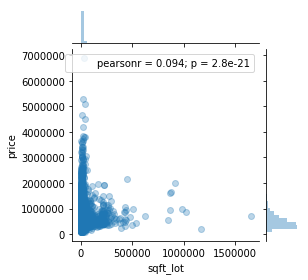

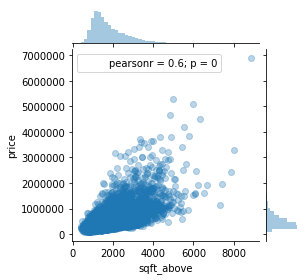

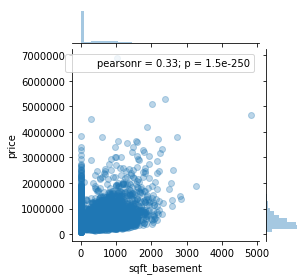

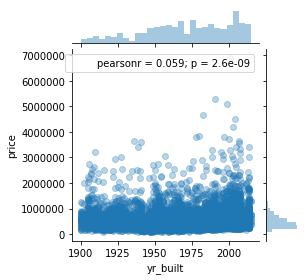

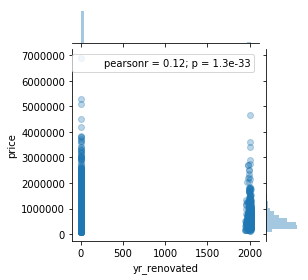

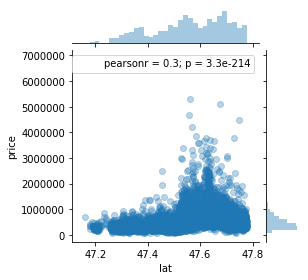

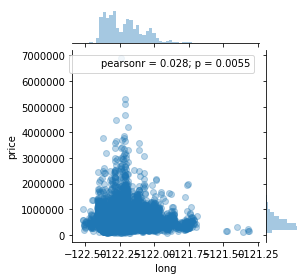

In [298]:
#皮尔森相关系数
continuous_cols=['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long']

for col in continuous_cols:
    g=sns.jointplot(x=col,y='price',data=data, alpha=0.3, size=4)
    g.annotate(stats.pearsonr)


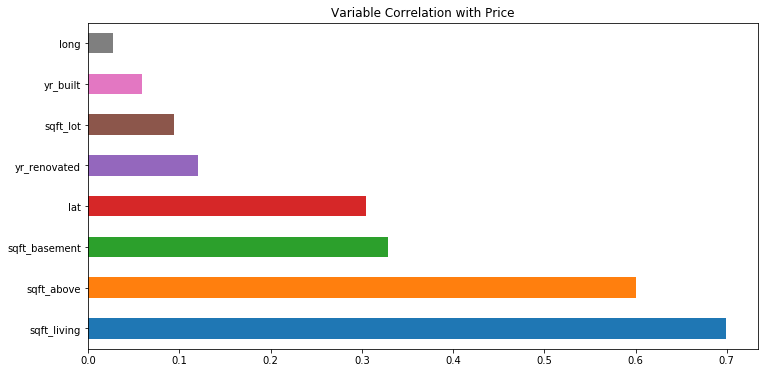

In [299]:
plt.figure(figsize=(12,6))
data.corr()['price'][continuous_cols].sort_values(ascending=False).plot(
    'barh',figsize=(12,6), title='Variable Correlation with Price')

In [300]:
#sqft_basement,yr_renovated存在很多为0的数据，所以可以考虑构建新的二值特征分别用来表示是否有地下室，是否曾翻新过。
data['basement_present']=data['sqft_basement'].apply(lambda x:1 if x>0 else 0)
data['renovated']=data['yr_renovated'].apply(lambda x:1 if x>0 else 0)

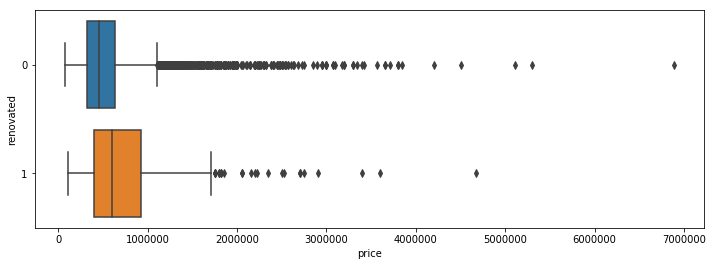

renovated 与 price 的点二列相关系数中 r = 0.12001849968412436, p= 2.088308248694044e-33 
basement_present 与 price 的点二列相关系数中 r = 0.18330716277977743, p= 2.7139191120161128e-76 


In [301]:
#上面构建的basement_present，renovated 属于分类变量，可以使用点二列相关系数来计算两个变量之间的关系

from scipy.stats import pointbiserialr

#绘制箱形图
plt.figure(figsize=(12,4))
sns.boxplot(y='renovated', x='price', data=data, orient='h')
plt.show()

#计算二列相关系数
r,p=pointbiserialr(data['renovated'],data['price'])
print('renovated 与 price 的点二列相关系数中 r = %s, p= %s ' %(r,p))
r,p=pointbiserialr(data['basement_present'],data['price'])
print('basement_present 与 price 的点二列相关系数中 r = %s, p= %s ' %(r,p))

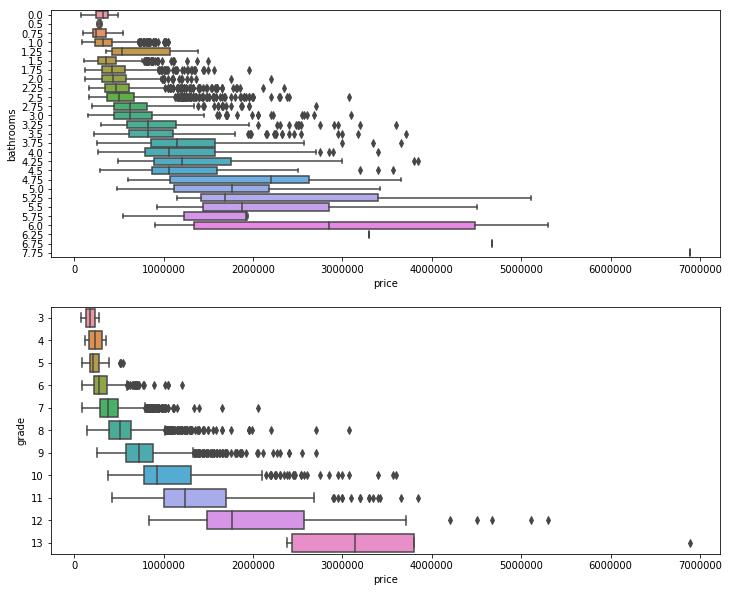

In [302]:
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.boxplot(y='bathrooms', x='price', data=data, orient='h')
plt.subplot(212)
sns.boxplot(y='grade', x='price', data=data, orient='h')
plt.show()

In [303]:
from scipy.stats import spearmanr

r,p=spearmanr(data['floors'], data['price'])
print('floors 与 price 的斯皮尔曼相关系数为 %s,其中 p= %s ' %(r,p))
r,p=spearmanr(data['bedrooms'], data['price'])
print('bedrooms 与 price 的斯皮尔曼相关系数为 %s,其中 p= %s ' %(r,p))
r,p=spearmanr(data['bathrooms'], data['price'])
print('bathrooms 与 price 的斯皮尔曼相关系数为 %s,其中 p= %s ' %(r,p))
r,p=spearmanr(data['grade'], data['price'])
print('grade 与 price 的斯皮尔曼相关系数为 %s,其中 p= %s ' %(r,p))

floors 与 price 的斯皮尔曼相关系数为 0.3127190036471108,其中 p= 9.586333125228778e-226 
bedrooms 与 price 的斯皮尔曼相关系数为 0.3458697748314727,其中 p= 5.6801269872902106e-279 
bathrooms 与 price 的斯皮尔曼相关系数为 0.5012034892956143,其中 p= 0.0 
grade 与 price 的斯皮尔曼相关系数为 0.6603554146361819,其中 p= 0.0 


In [339]:
#数据预处理
ordinal_cols=['floors','grade']

for col in ordinal_cols:
    dummies=pd.get_dummies(data[col], drop_first=False)
    dummies=dummies.add_prefix("{}#".format(col))
    data.drop(col, axis=1, inplace=True)
    data=data.join(dummies)

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
date             10000 non-null int64
price            10000 non-null int64
bedrooms         10000 non-null int64
bathrooms        10000 non-null float64
sqft_living      10000 non-null int64
sqft_lot         10000 non-null int64
sqft_above       10000 non-null int64
sqft_basement    10000 non-null int64
yr_built         10000 non-null int64
yr_renovated     10000 non-null int64
lat              10000 non-null float64
long             10000 non-null float64
floors#1.0       10000 non-null uint8
floors#1.5       10000 non-null uint8
floors#2.0       10000 non-null uint8
floors#2.5       10000 non-null uint8
floors#3.0       10000 non-null uint8
floors#3.5       10000 non-null uint8
grade#3          10000 non-null uint8
grade#4          10000 non-null uint8
grade#5          10000 non-null uint8
grade#6          10000 non-null uint8
grade#7          10000 non-null uint8
grade#8     

In [343]:
#分割训练集
from sklearn.model_selection import train_test_split
np.random.seed(21)
target=data['price']
data.drop('price', axis=1, inplace=True)


KeyError: 'price'

In [344]:
x_train,x_test,y_train,y_test=train_test_split(data,target ,train_size=0.7, random_state=1)

In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [308]:
def simple_linear_model(x_train, x_test, y_train, y_test, input_feature):
    lg=LinearRegression()
    lg.fit(x_train.as_matrix(columns=[input_feature]),y_train)
    RMSE=mean_squared_error(
        y_test,lg.predict(x_test.as_matrix(columns=[input_feature]))
    )**0.5
    return RMSE

In [345]:
np.random.seed(21)
RMSE=simple_linear_model(x_train,x_test,y_train,y_test,'sqft_living')
print('validation RMSE for sqft_living is :%s' % RMSE)

validation RMSE for sqft_living is :272725.72435556934


In [346]:
estimate_result=pd.DataFrame(columns=['feature','val_RMSE'])

np.random.seed(21)

for feature in data.columns:
    RMSE=simple_linear_model(x_train,x_test,y_train,y_test, feature)
    estimate_result= estimate_result.append({'feature':feature, 'val_RMSE':RMSE}, ignore_index=True)

In [347]:
estimate_result.sort_values(by='val_RMSE').head(10)

feature       val_RMSE
3     sqft_living  272725.724356
5      sqft_above  303317.484437
2       bathrooms  322879.316414
25       grade#11  352685.983771
24       grade#10  362177.716332
6   sqft_basement  362684.240732
21        grade#7  363408.196361
1        bedrooms  364696.321116
26       grade#12  364971.971229
9             lat  365484.169248

In [312]:
#多元回归
def multi_regression(x_train, x_test, y_train, y_test, input_feature):
    lg=LinearRegression()
    lg.fit(x_train.as_matrix(columns=input_feature),y_train)
    RMSE=mean_squared_error(
        y_test,lg.predict(x_test.as_matrix(columns=input_feature))
    )**0.5
    return RMSE

In [349]:
feature_combinations=[
    ['sqft_living', 'bathrooms', 'grade#10'],
    ['sqft_living', 'bathrooms', 'bedrooms'],
    ['sqft_above', 'bathrooms', 'grade#10'],
    ['sqft_basement', 'bathrooms', 'bedrooms' ]
]

np.random.seed(21)

for combination in feature_combinations:
    RMSE=multi_regression(x_train, x_test, y_train, y_test, combination)
    print('RMSE for %s is %s  ' % (', '.join(combination), RMSE))

RMSE for sqft_living, bathrooms, grade#10 is 270498.934717939  
RMSE for sqft_living, bathrooms, bedrooms is 267919.4373904804  
RMSE for sqft_above, bathrooms, grade#10 is 293572.1306924534  
RMSE for sqft_basement, bathrooms, bedrooms is 316533.8645739047  


In [314]:

feature_combinations


[['sqft_living', 'bathrooms', 'grade#10'],
 ['sqft_living', 'bathrooms', 'bedrooms'],
 ['sqft_above', 'bathrooms', 'grade#10'],
 ['sqft_basement', 'bathrooms', 'bedrooms']]

In [351]:

x_train['sqft_living_squared']=x_train['sqft_living'].apply(lambda x:x**2)
x_test['sqft_living_squared']=x_test['sqft_living'].apply(lambda x:x**2)
x_train['sqft_above_squared']=x_train['sqft_above'].apply(lambda x:x**2)
x_test['sqft_above_squared']=x_test['sqft_above'].apply(lambda x:x**2)

squared_combinations=[
     ['sqft_living', 'sqft_living_squared'],
     ['sqft_above', 'sqft_above_squared']
]

np.random.seed(21)


for squared_combination in squared_combinations:
    RMSE=multi_regression(x_train, x_test, y_train, y_test, squared_combination)
    print('RMSE for %s is %s  ' % (', '.join(squared_combination), RMSE))

RMSE for sqft_living, sqft_living_squared is 269229.9748621273  
RMSE for sqft_above, sqft_above_squared is 307913.9359206408  


In [337]:
np.random.seed(21)

RMSE=multi_regression(x_train, x_test, y_train, y_test, x_train.columns)
print('RMSE for all features before construction is : %s' %  RMSE)

RMSE for all features before construction is : 215784.21596902783


In [352]:
x_train['sqft_living_cubed']=x_train['sqft_living'].apply(lambda x:x**3)
x_test['sqft_living_cubed']=x_test['sqft_living'].apply(lambda x:x**3)

x_train['bedrooms_cubed']=x_train['bedrooms'].apply(lambda x:x**3)
x_test['bedrooms_cubed']=x_test['bedrooms'].apply(lambda x:x**3)


x_train['bed_bath_rooms']=x_train['bedrooms'] * x_train['bathrooms']
x_test['bed_bath_rooms']=x_test['bedrooms'] * x_test['bathrooms']

x_train['log_sqft_living']=x_train['sqft_living'].apply(lambda x:np.log(x))
x_test['log_sqft_living']=x_test['sqft_living'].apply(lambda x:np.log(x))


In [353]:

from sklearn.ensemble import RandomForestRegressor

np.random.seed(21)

rf_reg=RandomForestRegressor(n_estimators=50, verbose=1)
rf_reg.fit(x_train, y_train)

combine_lists=lambda item: [ item[0], item[1]]
feature_importance=list(map(combine_lists, zip(x_train.columns, rf_reg.feature_importances_)))
feature_importance=pd.DataFrame(
    feature_importance, columns=['feature','importance']
).sort_values(by='importance', ascending=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.7s finished


In [331]:
rf_reg.feature_importances_

array([4.51922677e-03, 1.50075938e-02, 1.19537475e-01, 3.92930391e-02,
       1.50091326e-02, 8.72841842e-03, 2.04851981e-02, 3.48126813e-03,
       2.03838537e-01, 8.11006574e-02, 1.12429390e-03, 5.56155649e-04,
       1.04868077e-03, 6.46341784e-04, 1.15644878e-03, 9.89216104e-04,
       1.23061158e-03, 5.93204100e-07, 8.01952260e-10, 4.06998164e-06,
       4.93776517e-05, 5.79206347e-04, 6.52014875e-03, 5.04030794e-03,
       4.25457754e-03, 4.79691111e-03, 5.16454614e-03, 4.32302022e-03,
       1.31863917e-04, 1.32295932e-01, 1.46958702e-02, 1.31348243e-01,
       3.61396226e-03, 1.83308382e-02, 1.51098236e-01])

In [354]:
feature_importance.head(10)

feature  importance
9                   lat    0.201754
30    sqft_living_cubed    0.154750
33      log_sqft_living    0.130969
28  sqft_living_squared    0.130767
3           sqft_living    0.117393
10                 long    0.079345
4              sqft_lot    0.037598
7              yr_built    0.019052
32       bed_bath_rooms    0.017668
29   sqft_above_squared    0.014261

In [355]:
filter_feature=feature_importance[feature_importance['importance']>0.01]['feature'].tolist()

In [356]:
np.random.seed(21)


RMSE=multi_regression(x_train, x_test, y_train, y_test, filter_feature)
print('RMSE for filter features after construction is : %s' %  RMSE)

RMSE=multi_regression(x_train, x_test, y_train, y_test, x_train.columns)
print('RMSE for all features after construction is : %s' %  RMSE)

RMSE for filter features after construction is : 238455.6432823902
RMSE for all features after construction is : 217813.1797004283


In [348]:
file=open(r'C:\Users\jxluo\Downloads\美国King County房价预测训练赛\kc_test.csv')
test=pd.read_csv(file, encoding='utf-8',header=None)
test.columns=['date','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long']

test.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  grade  \
0  20140502         2       1.00          880      6380     1.0      7   
1  20150213         4       2.50         2880      8833     2.0      7   
2  20141215         4       2.50         1980      5020     2.0      7   
3  20140617         3       2.50         2830      6536     2.0      9   
4  20150410         3       1.75         1900     13600     1.0      8   

   sqft_above  sqft_basement  yr_built  yr_renovated      lat     long  
0         880              0      1938          1994  47.6924 -122.322  
1        2880              0      2006             0  47.5388 -121.890  
2        1980              0      2007             0  47.5147 -122.190  
3        2830              0      1989             0  47.7462 -122.172  
4        1900              0      1956             0  47.6163 -122.219

In [359]:
print(test.isnull().sum())

date                      0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
lat                       0
long                      0
sqft_living_squared       0
sqft_above_squared        0
sqft_living_cubed         0
bed_bath_rooms         2376
log_sqft_living           0
dtype: int64


In [360]:
test['sqft_living_squared']=test['sqft_living'].apply(lambda x:x**2)

test['sqft_above_squared']=test['sqft_above'].apply(lambda x:x**2)

test['sqft_living_cubed']=test['sqft_living'].apply(lambda x:x**3)
test['bed_bath_rooms']=test['bedrooms'] * x_test['bathrooms']

test['log_sqft_living']=test['sqft_living'].apply(lambda x:np.log(x))

col=['lat',
 'sqft_living_cubed',
 'log_sqft_living',
 'sqft_living_squared',
 'sqft_living',
 'long',
 'sqft_lot',
 'yr_built',
 'sqft_above_squared',
 'sqft_above',
 'date',
 'bathrooms']

lg=LinearRegression()
lg.fit(x_train.as_matrix(columns=col),y_train)
test_pred=lg.predict(test.as_matrix(columns=col))



In [361]:
result.to_csv('result.csv',header=['price'],index=None)

In [357]:
filter_feature

['lat',
 'sqft_living_cubed',
 'log_sqft_living',
 'sqft_living_squared',
 'sqft_living',
 'long',
 'sqft_lot',
 'yr_built',
 'bed_bath_rooms',
 'sqft_above_squared',
 'sqft_above',
 'date',
 'bathrooms']